## **Aufgabe 2 - Elektromagnetischer Schwingkreis**

Durch bestimmte Kombination von Widerständen, Spulen und Kondensatoren können in der Elektrotechnik Schwingungen erzeugt werden. Eine solche Schaltung bezeichnet man als elektromagnetischen Schwingkreis. Solch ein Schwingkreis besteht im Allgemeinen aus einem Kondensator und einer Spule. Diese Komponenten können Energie in elektrischen bzw. magnetischen Feldern speichern und abgeben (siehe nachfolgende Abbildung). Im idealen Fall, durch Vernachlässigung der ohm'schen Widerstände, bezeichnet man den Schwingkreis als ungedämpft. Der realitätsnähere Fall, unter Berücksichtigung der ohm'schen Widerstände, wird als gedämpfter elektromagnetischer Schwingkreis bezeichnet.

![alt text](Abbildungen/Elektromagn-Schwingkreis.png)

Die mathematische Beschreibung solcher Systeme erfolgt über die Differentialgleichung der gedämpften elektromagnetischen Schwingung:

$$ L \cdot \ddot{Q}(t) + R \cdot \dot{Q}(t) + \dfrac{1}{C} \cdot Q(t) = 0$$

mit der elektrischen Ladung $Q$, dem ohmschen Widerstand $R$, dem induktiven Widerstand der Spule $L$ sowie dem kapazitiven Widerstand des Kondensators $C$. Die physikalischen Parameter des gegebenen Systems lauten wie folgt:
 - ohmscher Widerstand $R = 700\,\Omega$
 - Induktivität der Spule $L = 633\,\text{H}$
 - Kapazität des Kondensators $C = 40 \times 10^{-6}\,\text{F}$

Für das Problem gelten folgende Anfangsbedingungen bei $t = 0\,\text{s}$: Der Startwert der elektrischen Ladung beträgt $Q_0 = Q(t = 0) = 1\,\text{A s} = 1\,\text{C}$ und für die zweite Ableitung kann im ersten Zeitschritt vereinfachend folgende Diskretisierung verwendet werden:

$$ \ddot{Q}(t=0) = \dfrac{Q_{n+1} - Q_n}{\Delta t^2} $$

Für Differentialgleichung der gedämpften elektrischen Schwingung kann eine exakte analytische Lösung formuliert werden:

$$Q(t) = Q_0 \left(  \cos ( \omega t ) + \dfrac{k}{\omega} \sin ( \omega t ) \right) \text{e}^{-k t} $$

Die Parameter $k$ und $\omega$ sind wie folgt definiert:

$$ k = \dfrac{R}{2L} $$

$$ \omega = \sqrt{\dfrac{1}{LC} - k^2} $$

### **Teilaufgaben**

  1. Diskretisieren Sie die Differentialgleichung unter Verwendung Sie der Vorwärtsdifferenz (1. Ordnung) für die 1. zeitliche Ableitung und dem zentrale Differenzenschema (2. Ordnung) für die zweite zeitliche Ableitung. Stellen Sie die diskretisierte Gleichung im Jupyter Notebook dar.
  2. Simulieren Sie mit Hilfe der diskretisierten Differentialgleichung das System für 10 s realer Zeit. Nutzen Sie eine Zeitschrittweite von $\Delta t = 0{,}1\,\text{s}$. **Hinweis:** Nutzen Sie für die Berechnung des ersten Zeitschritts die gegebenen Randbedingungen. Anschließend können Sie für die weiteren Zeitschritte die diskretisierte Differentialgleichung lösen.
  3. Vergleichen Sie Ihre Lösung mit der Analytischen und stellen Sie beide Verläufe in einem Diagramm gegenüber. Wie groß ist der absolute, maximale Fehler zwischen analytischer und numerischer Lösung? Wie ändert sich der absolute, maximale Fehler, wenn die Zeitschrittweite auf $\Delta t = 0{,}01\,\text{s}$ reduziert wird?

## =================================================================================

## Vollständiger Code

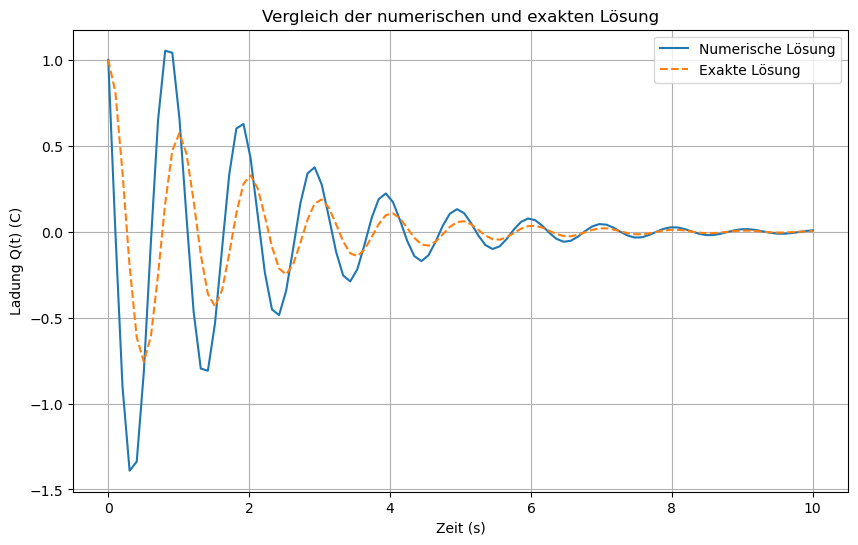

Maximaler Fehler (bei dt=0.1s): 1.245 C
Maximaler Fehler (bei dt=0.01s): 1.489 C


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Gegebene Parameter
L = 633  # Induktivität in H
R = 700  # Widerstand in Ohm
C = 40e-6  # Kapazität in F
Q0 = 1  # Anfangsladung in C
dt = 0.1  # Zeitschritt in s
t_max = 10  # maximale Zeit in s
Zeit_Schritte = int(t_max // dt)  # Anzahl der Zeitschritte

# Berechnung der Parameter k und omega
k = R / (2 * L)
omega = np.sqrt(1 / (L * C) - k ** 2)

# Initialisierungen
Q = np.zeros(Zeit_Schritte + 1)  # Array für die Ladung Q(t)
Q[0] = Q0  # Anfangsladung

# Simulation der Schwingung mit der diskretisierten Differentialgleichung
for n in range(1, Zeit_Schritte):
    # Diskretisierte Gleichung
     Q[n + 1] = (Q[n]*((R*C*dt + 2*L*C - dt**2) / (L*C)) - Q[n-1]) / (1 + (R*dt)/L)
# Zeitachse
Zeit = np.linspace(0, t_max, Zeit_Schritte + 1)
# Exakte Lösung für den Vergleich
Q_exact = Q0 * (np.cos(omega * Zeit) + (k / omega) * np.sin(omega * Zeit)) * np.exp(-k * Zeit)

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(Zeit, Q, label="Numerische Lösung")
plt.plot(Zeit, Q_exact, label="Exakte Lösung", linestyle='--')
plt.xlabel("Zeit (s)")
plt.ylabel("Ladung Q(t) (C)")
plt.title("Vergleich der numerischen und exakten Lösung")
plt.legend()
plt.grid(True)
plt.show()



# Berechnung des maximalen Fehlers
max_error = max(abs(Q - Q_exact))
print(f"Maximaler Fehler (bei dt=0.1s): {max_error:.3f} C")

# Simulation mit kleinerer Zeitschrittweite dt = 0.01s
dt_fine = 0.01
Zeit_Schritte_fine = int(t_max / dt_fine)
Q_fine = np.zeros(Zeit_Schritte_fine + 1)
Q_fine[0] = Q0

# Berechnung mit kleinerer Zeitschrittweite
for n in range(1, Zeit_Schritte_fine):
    Q_fine[n + 1] = (Q_fine[n] * (2 * L / dt_fine**2 + 1 / C) - Q_fine[n - 1] * (L / dt_fine**2)) / (2 * L / dt_fine**2 + R / dt_fine)

# Exakte Lösung für dt = 0.01s
time_fine = np.linspace(0, t_max, Zeit_Schritte_fine + 1)
Q_exact_fine = Q0 * (np.cos(omega * time_fine) + (k / omega) * np.sin(omega * time_fine)) * np.exp(-k * time_fine)

# Berechnung des maximalen Fehlers für dt = 0.01s
max_error_fine = max(abs(Q_fine - Q_exact_fine))
print(f"Maximaler Fehler (bei dt=0.01s): {max_error_fine:.3f} C")


Der maximale Fehler erhöht sich bei der Reduzierung von der Zeitschrittweite. 

## Trennung und schrittweise Erläuterung des Codes.

### 1. Import der notwendigen Bibliotheken

Zu Beginn des Codes werden die folgenden Bibliotheken importiert:

- **NumPy**: Wird für numerische Berechnungen verwendet, insbesondere für die Erstellung von Arrays und mathematische Funktionen.
- **Matplotlib**: Wird verwendet, um Diagramme zu erstellen und die Ergebnisse visuell darzustellen.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Parameter und berechnung der Zeitschritte

In [14]:
# Gegebene Parameter
L = 633  # Induktivität in H
R = 700  # Widerstand in Ohm
C = 40e-6  # Kapazität in F
Q0 = 1  # Anfangsladung in C
dt = 0.1  # Zeitschritt in s
t_max = 10  # maximale Zeit in s
Zeit_Schritte = int(t_max // dt)  # Anzahl der Zeitschritte

### 3. Berechnung von omega und k

In [15]:
# Berechnung der Parameter k und omega
k = R / (2 * L) # Einheit 1/s
omega = np.sqrt(1 / (L * C) - k ** 2) # Einheit 1/s

### 4. Erstellung eines Arrays für die Ladung Q mit der Länge (Zeit_Schritte + 1)

In [16]:
# Initialisierungen
Q = np.zeros(Zeit_Schritte + 1)  # Array für die Ladung Q(t)
Q[0] = Q0  # Anfangsladung

### 5. Diskritisierung
### 1. Annäherung der Ableitungen
- Erste Ableitung $\frac{dQ}{dt}$ wird approximiert durch:
  $$
  \frac{dQ}{dt} \approx \frac{Q[n+1] - Q[n]}{\Delta t}
  $$

- Zweite Ableitung $\frac{d^2Q}{dt^2}$ wird approximiert durch:
  $$
  \frac{d^2 Q}{dt^2} \approx \frac{Q[n+1] - 2Q[n] + Q[n-1]}{\Delta t^2}
  $$

### 2. Einsetzen in die Differentialgleichung und nach Q[n+1] Umformen 
Die finale rekursive Formel lautet:
$$
Q[n+1] = \frac{Q[n] \cdot \left( \frac{R \cdot C \cdot \Delta t + 2 \cdot L \cdot C - \Delta t^2}{L \cdot C} \right) - Q[n-1]}{1 + \frac{R \cdot \Delta t}{L}}
$$

In [17]:
# Simulation der Schwingung mit der diskretisierten Differentialgleichung
for n in range(1, Zeit_Schritte):
    # Diskretisierte Gleichung
     Q[n + 1] = (Q[n]*((R*C*dt + 2*L*C - dt**2) / (L*C)) - Q[n-1]) / (1 + (R*dt)/L)

### 6. Exacte Lösung

In [18]:
# Zeitachse
Zeit = np.linspace(0, t_max, Zeit_Schritte + 1)
# Exakte Lösung für den Vergleich
Q_exact = Q0 * (np.cos(omega * Zeit) + (k / omega) * np.sin(omega * Zeit)) * np.exp(-k * Zeit)

### 7. Darstellung und Vergleich

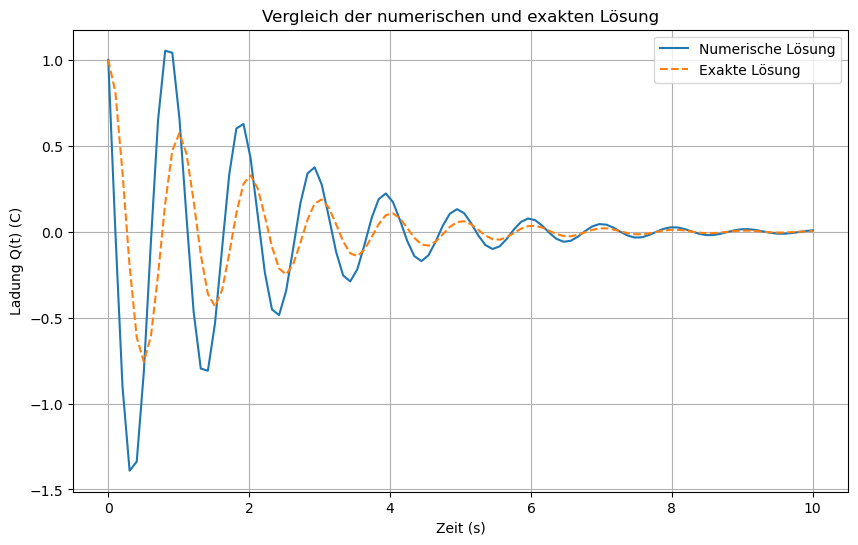

In [19]:
# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(Zeit, Q, label="Numerische Lösung")
plt.plot(Zeit, Q_exact, label="Exakte Lösung", linestyle='--')
plt.xlabel("Zeit (s)")
plt.ylabel("Ladung Q(t) (C)")
plt.title("Vergleich der numerischen und exakten Lösung")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Berechnung des maximalen Fehlers
max_error = max(abs(Q - Q_exact))
print(f"Maximaler Fehler (bei dt=0.1s): {max_error:.3f} C")


Maximaler Fehler (bei dt=0.1s): 1.245 C


### 8. Nummerische und exacte Lösung für $\Delta t = 0{,}01\,\text{s}$

In [21]:
# Simulation mit kleinerer Zeitschrittweite dt = 0.01s
dt_fine = 0.01
Zeit_Schritte_fine = int(t_max / dt_fine)
Q_fine = np.zeros(Zeit_Schritte_fine + 1)
Q_fine[0] = Q0

# Berechnung mit kleinerer Zeitschrittweite
for n in range(1, Zeit_Schritte_fine):
    Q_fine[n + 1] = (Q_fine[n] * (2 * L / dt_fine**2 + 1 / C) - Q_fine[n - 1] * (L / dt_fine**2)) / (2 * L / dt_fine**2 + R / dt_fine)


# Exakte Lösung für dt = 0.01s
time_fine = np.linspace(0, t_max, Zeit_Schritte_fine + 1)
Q_exact_fine = Q0 * (np.cos(omega * time_fine) + (k / omega) * np.sin(omega * time_fine)) * np.exp(-k * time_fine)

### 9. Berechnung des maximalen Fehlers

In [22]:
# Berechnung des maximalen Fehlers für dt = 0.1s
max_error = max(abs(Q - Q_exact))
print(f"Maximaler Fehler (bei dt=0.1s): {max_error:.3f} C")

# Berechnung des maximalen Fehlers für dt = 0.01s
max_error_fine = max(abs(Q_fine - Q_exact_fine))
print(f"Maximaler Fehler (bei dt=0.01s): {max_error_fine:.3f} C")

Maximaler Fehler (bei dt=0.1s): 1.245 C
Maximaler Fehler (bei dt=0.01s): 1.489 C
